                                    CV LAB 3                                              
Authors: Neelanjan Mukherji and Michel Akpro


First, we start off with importing any necessary libraries. 

In [3]:

import cv2 
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

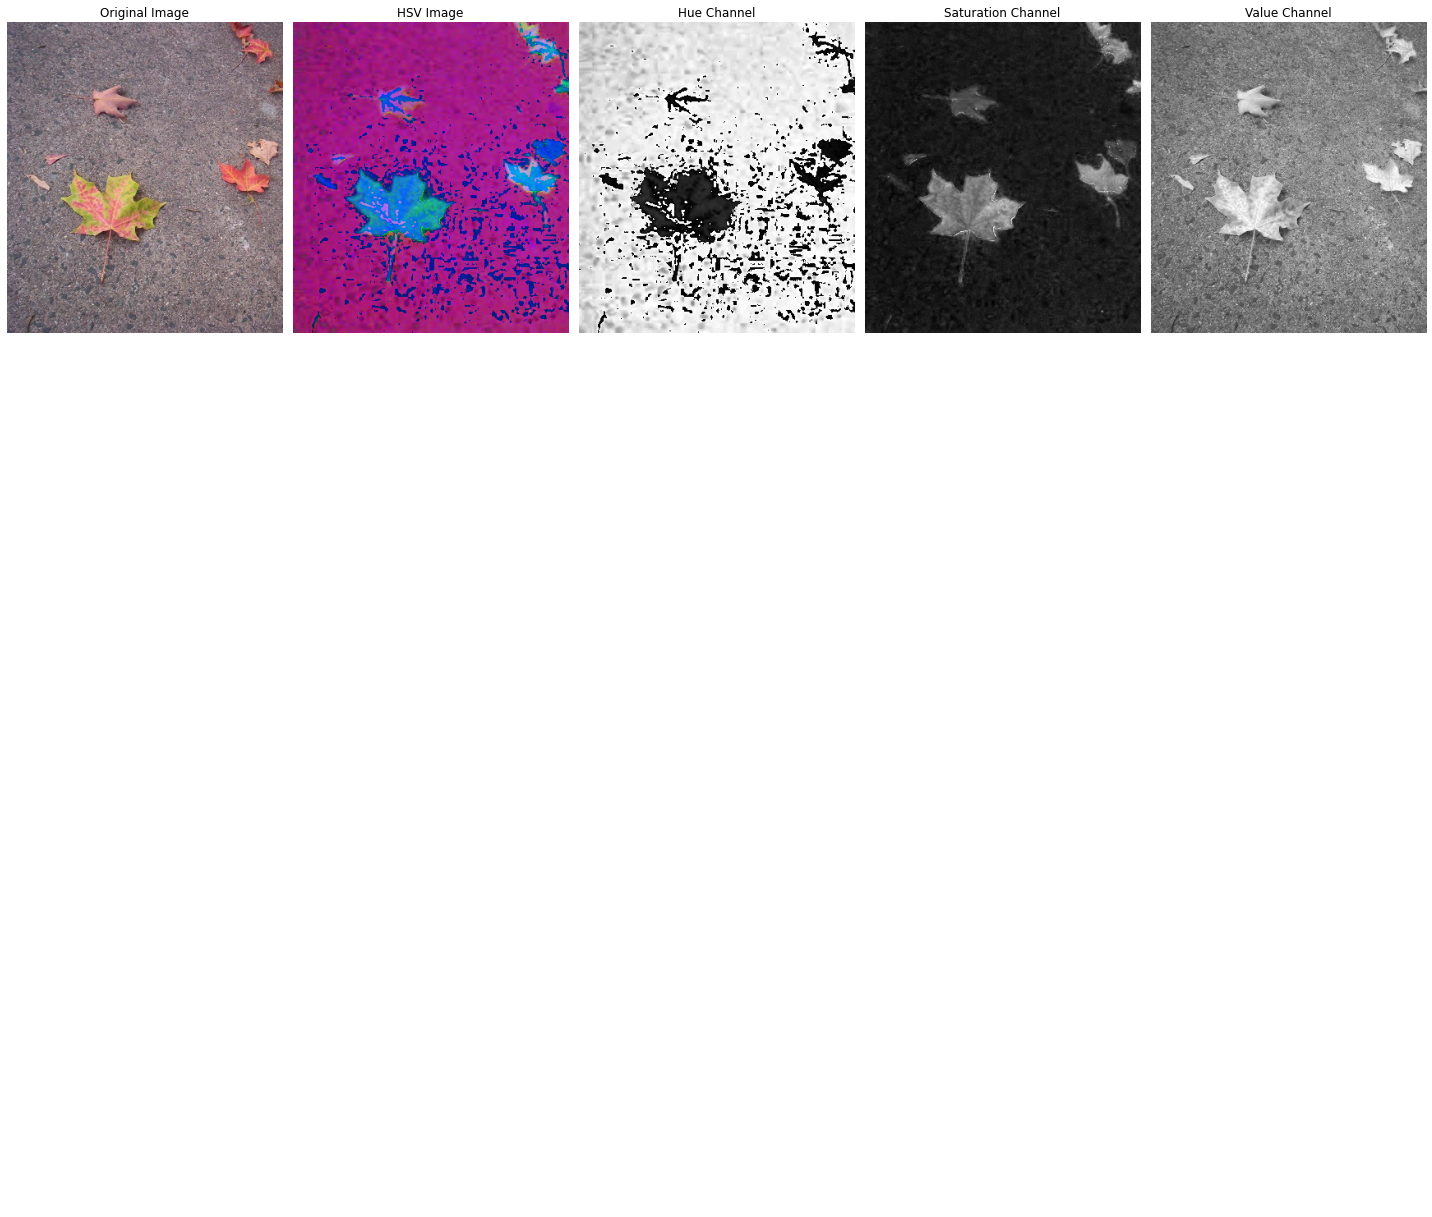

In [4]:
##  BIG MICH

img = cv2.imread('leaves.jpg')

cv2.imshow("image Leaves ", img)

imgHSV= cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
imgHue = imgHSV[:, :, 0]
imgSat = imgHSV[:, :, 1]
imgVal= imgHSV[:, :, 2]

fig, axes = plt.subplots(2, 5, figsize=(20, 20))

# Original Image
axes[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original Image')

# HSV Image
axes[0, 1].imshow(imgHSV, cmap='hsv')
axes[0, 1].set_title('HSV Image')

# Hue Channel
axes[0, 2].imshow(imgHue, cmap='gray')
axes[0, 2].set_title('Hue Channel')

# Saturation Channel
axes[0, 3].imshow(imgSat, cmap='gray')
axes[0, 3].set_title('Saturation Channel')

# Value Channel
# Normalize the Value channel to be between 0 and 1
imgVal_normalized = imgVal / 255.0
axes[0, 4].imshow(imgVal_normalized, cmap='gray')
axes[0, 4].set_title('Value Channel')

# Remove axis labels
for ax in axes.flatten():
    ax.axis('off')

plt.tight_layout()
plt.show()


With the image read and converted to HSV format, the next step is to apply a mask of threshold values. 

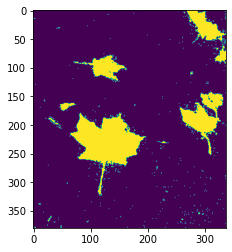

In [5]:
ret, mask = cv2.threshold(imgSat, 50, 180,cv2.THRESH_BINARY)
plt.imshow( mask)


From comparing the hue saturation and intensity value elements, intensity value held the most promise in being able to isolate the leaves from the background and capture all the loose leaf fragments on the ground. 

The next step is to create a structured element to use for erosion and dilation to perform morphology. This is done using the getStructuringElement functiion found in the openCV libraries. 

[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]


(([], []), ([], []))

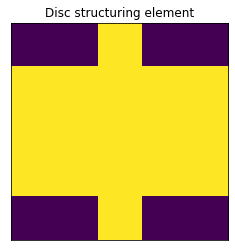

In [6]:
disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
print(disc)
fig = plt.figure();
plt.subplot(111), plt.imshow(disc), plt.title("Disc structuring element")
plt.xticks([]), plt.yticks([])

From here we perform Erosion.

(([], []), ([], []))

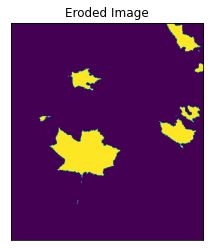

In [7]:
eroded = cv2.erode(mask, disc)
plt.imshow(eroded), plt.title("Eroded Image")
plt.xticks([]), plt.yticks([])

With Erosion now performed, it can be seen that most of the remaining noise has been filtered from the masked binary image. Now let's observe the effects of dilation on the same masked binary image. The code below performs image dilation.  

(([], []), ([], []))

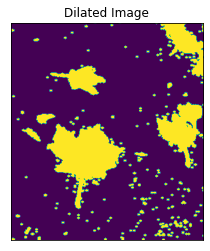

In [8]:
dilated = cv2.dilate(mask, disc)
plt.imshow(dilated), plt.title("Dilated Image")
plt.xticks([]), plt.yticks([])

Now that we've explored dilation and erosion on a masked image, let's explore opening...We use the openCV functions to perform this. As opening involves eroding an image to remove white noise, and then dilating the eroded image to increase the object area, the previous eroded image will be dilated using the same structured element. This will be done in two ways:

Approach #1:
    Take eroded image already defined above, and dilate the image using the same disc shaped structured element. 

Approach #2:
    Take original mask image, and feed that into the morphologyEx() function available in the openCV library. 

Let's take a look at approach #1...

(([], []), ([], []))

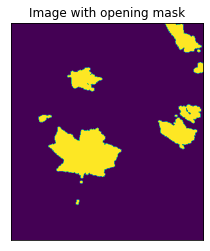

In [9]:
opening_manual = cv2.dilate(eroded, disc)
plt.imshow(opening_manual), plt.title("Image with opening mask")
plt.xticks([]), plt.yticks([])

Inversely, the closing mask could be performed by taking the dilated image and eroding it as shown below...

(([], []), ([], []))

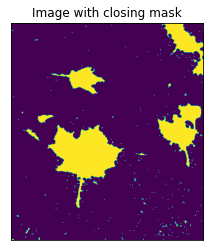

In [10]:
closing_manual = cv2.erode(dilated, disc)
plt.imshow(closing_manual), plt.title("Image with closing mask")
plt.xticks([]), plt.yticks([])

It can be seen that the process of opening involves removing white noise, and then applying dilation to fill in the gaps where there were dense areas of intensity values. Inversely, the process of closing also yielded impressive results by applying dilation first on the masked image to increase the object area, and then eroding the dilated image to remove as much white noise as possible. It can be seen that in terms of filtering out the leaves from the background, the process of opening yielded more promising results. But by applying closing, certain details of the leaves were captured that were otherwise lost in the process of eroding. Like the stem of the leaf for example.  

Approach #2

(([], []), ([], []))

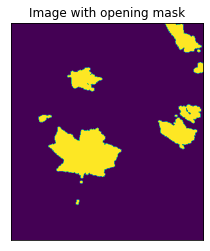

In [11]:
opening_auto = cv2.morphologyEx(mask, cv2.MORPH_OPEN, disc)
plt.imshow(opening_auto), plt.title("Image with opening mask")
plt.xticks([]), plt.yticks([])

Repeating the process but for closing...

(([], []), ([], []))

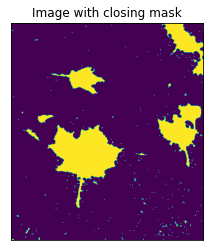

In [12]:
closing_auto = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, disc)
plt.imshow(closing_auto), plt.title("Image with closing mask")
plt.xticks([]), plt.yticks([])

Making a subplot comparison of Approach #1 and Approach #2, 

=========================================================PART 2===========================================================================


In this part, an image was chosen that is then converted to HSV format, masked into a binary image, and has dilation and/or erosion, or both performed to extract a specified feature of the photo. The photo in question is the image below. 

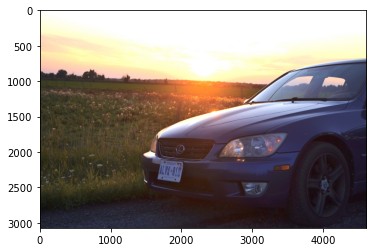

In [13]:
lexi = cv2.imread('is300.jpg')
plt.imshow(cv2.cvtColor(lexi, cv2.COLOR_BGR2RGB))

Now we convert image to HSV and compare the outputs. 


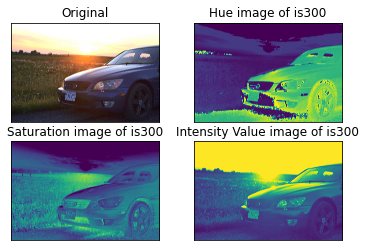

In [14]:
imgHSV= cv2.cvtColor(lexi, cv2.COLOR_BGR2HSV)
imgHueLex = imgHSV[:, :, 0]
imgSatLex = imgHSV[:, :, 1]
imgValLex = imgHSV[:, :, 2]

plt.subplot(221), plt.imshow(cv2.cvtColor(lexi, cv2.COLOR_BGR2RGB)), plt.title("Original")
plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(imgHueLex), plt.title("Hue image of is300")
plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(imgSatLex), plt.title("Saturation image of is300")
plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(imgValLex), plt.title("Intensity Value image of is300")
plt.xticks([]), plt.yticks([])
plt.show()


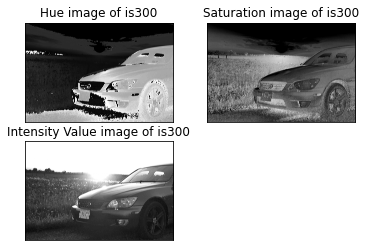

In [15]:
#Convert the HSV images to gray 
plt.subplot(221), plt.imshow(imgHueLex, cmap = plt.cm.gray), plt.title("Hue image of is300")
plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(imgSatLex, cmap = plt.cm.gray), plt.title("Saturation image of is300")
plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(imgValLex, cmap = plt.cm.gray), plt.title("Intensity Value image of is300")
plt.xticks([]), plt.yticks([])
plt.show()


From here, we can see that the saturated image of the beautiful vehicle shows the most distinct contour lines. This will aid in converting the image to binary.

The next step is to mask the grayscale saturated image into a binary image. 

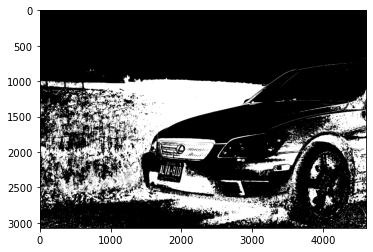

In [18]:
ret1, mask1 = cv2.threshold(imgSatLex, 110, 210,cv2.THRESH_BINARY)
plt.imshow( mask1, cmap = plt.cm.gray)

From here, another structured element kernel was created to perform morphological operations. This time, rather than using the getStructuredElement() function, the kernel was defined manually. 

BRUH

[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]


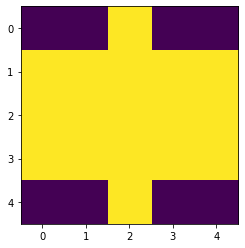

In [24]:
disc2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
print(disc2)

plt.imshow(disc2)

With the structured element defined above, the next step is to apply erosion and dilation (opening mask) to remove white noise and increase the object area. 

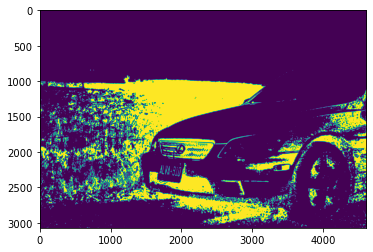

In [25]:
############## OPENING MASK #################
erodedlexi = cv2.erode(mask1, disc2)
plt.imshow(erodedlexi)

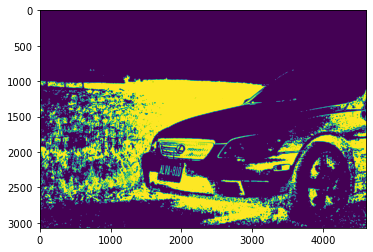

In [26]:
dilatedLexi = cv2.dilate(erodedlexi, disc2)
plt.imshow(dilatedLexi)

In [ ]:
#waits for user to press a key
cv2.waitKey(0)
cv2.destroyAllWindows()